# Unsupervised Learning including Clustering, Dimensionality Reduction, Anomaly Detection, and Autoencoder

## 1.0 Import libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn import datasets

In [98]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.base import clone
from scipy.stats import mode
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.datasets import mnist, fashion_mnist, cifar100
from scipy.stats import mode
from sklearn.ensemble import IsolationForest
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

## 2.0 Clustering

### 2.1 Load data

In [53]:
iris = datasets.load_iris()

In [54]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [55]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 2.2 Modeling

In [56]:
kmeans = KMeans(n_clusters=3, random_state = 42)

In [57]:
clusters = kmeans.fit_predict(X)

### 2.3 Evaluation

In [58]:
conf_matrix = confusion_matrix(y, clusters)
conf_matrix

array([[ 0, 50,  0],
       [ 3,  0, 47],
       [36,  0, 14]])

In [66]:
def relabel_clusters(y_true, clusters):
    new_labels = np.zeros_like(clusters)
    for i in range(3):
        mask = clusters == i
        if np.any(mask):
            new_labels[mask] = mode(y_true[mask])[0]
    return new_labels

In [67]:
aligned_clusters = relabel_clusters(y, clusters)

In [68]:
aligned_conf_matrix = confusion_matrix(y, aligned_clusters)

In [69]:
aligned_conf_matrix

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0, 14, 36]])

In [59]:
'''
def relabel_clusters(conf_matrix):
  new_labels = np.zeros_like(clusters)
  for i in range(len(conf_matrix)):
    new_labels[clusters == np.argmax(conf_matrix[i])] = i
    return new_labels
'''

In [60]:
# aligned_clusters = relabel_clusters(conf_matrix)

In [70]:
misclassified_indices = np.where(aligned_clusters != y)[0]

In [74]:
def plot_clusters(X, clusters, misclassified_indices, variable_pairs):
  num_pairs = len(variable_pairs)
  fig, axes = plt.subplots(num_pairs // 2, 2, figsize=(12, 4 * (num_pairs // 2)), tight_layout=True)
  for ax, (i, j) in zip(axes.flatten(), variable_pairs):
    ax.scatter(X[:, i], X[:, j], c=clusters, cmap='viridis', edgecolor='k', s=100, label='Clusters')
    ax.scatter(X[misclassified_indices, i], X[misclassified_indices, j],
    edgecolor='red', facecolor='none', s=200, label='Misclassified')
    ax.set_xlabel(iris.feature_names[i])
    ax.set_ylabel(iris.feature_names[j])
    ax.set_title(f'Clusters based on {iris.feature_names[i]} and {iris.feature_names[j]}')
    ax.legend()

plt.show()

In [75]:
variable_pairs = list(combinations(range(4), 2))

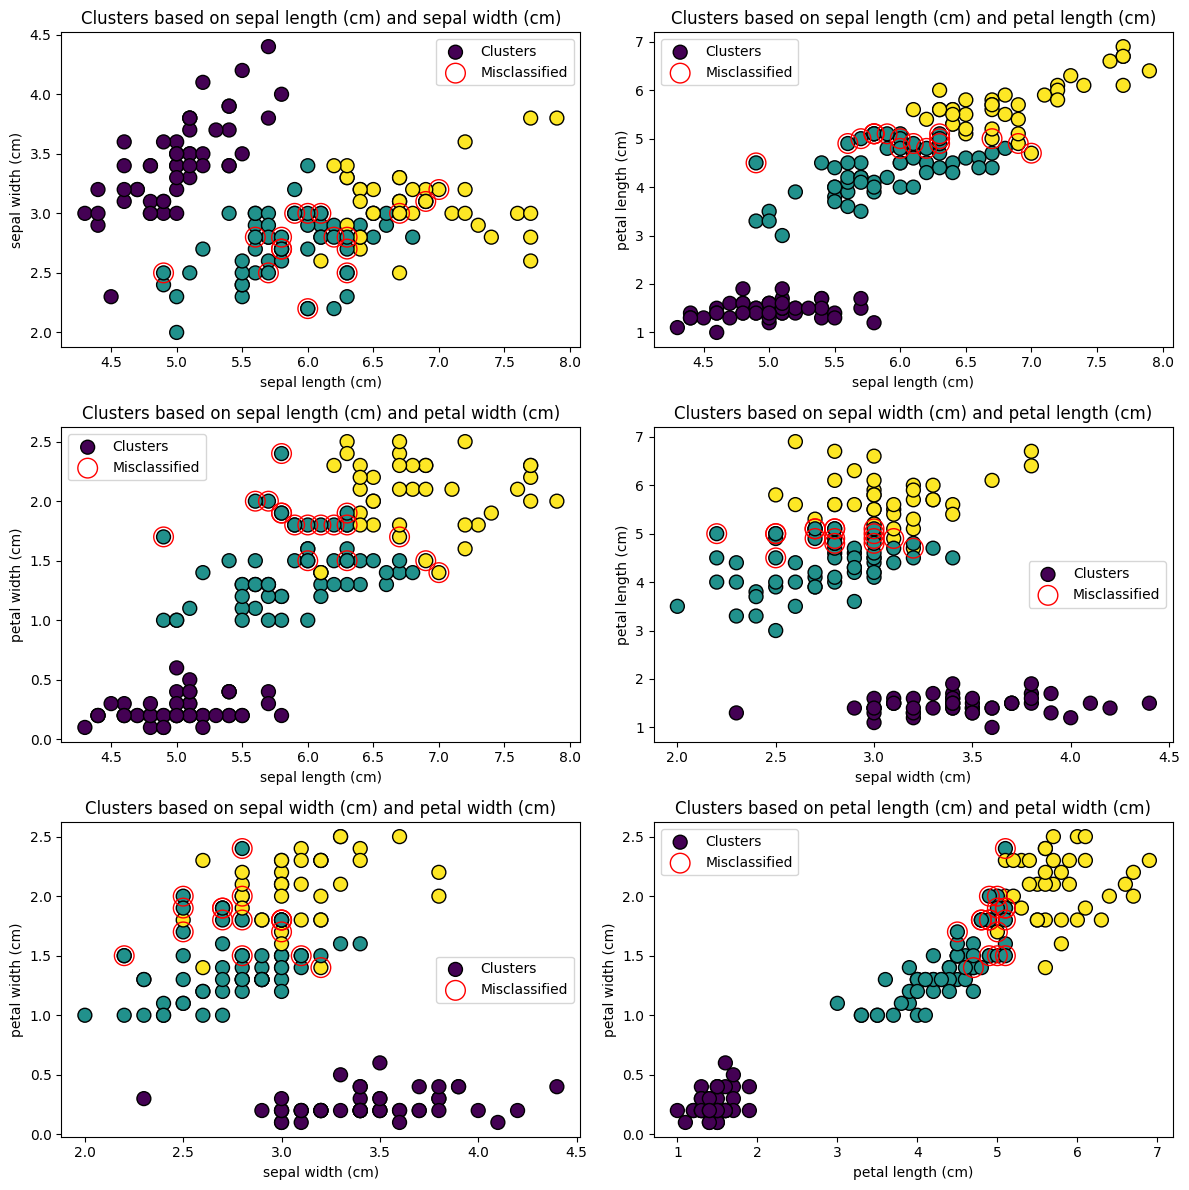

In [76]:
plot_clusters(X, aligned_clusters, misclassified_indices, variable_pairs)

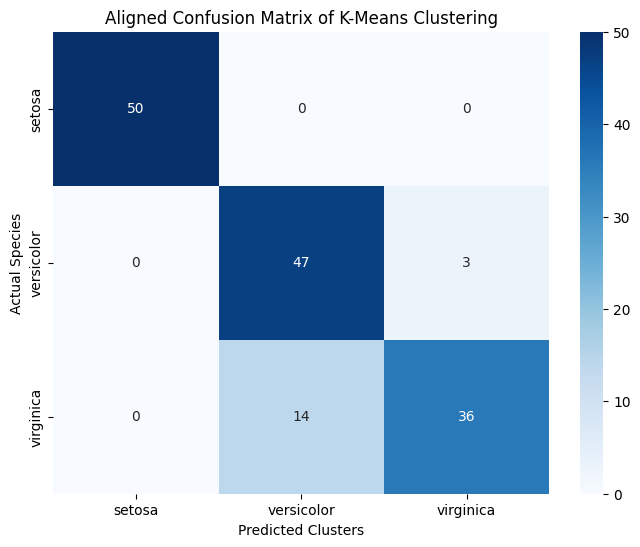

In [77]:
aligned_conf_matrix = confusion_matrix(y, aligned_clusters)
plt.figure(figsize=(8, 6))
sns.heatmap(aligned_conf_matrix, annot=True, fmt='d', cmap='Blues',
  xticklabels=target_names,
  yticklabels=target_names)
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Species')
plt.title('Aligned Confusion Matrix of K-Means Clustering')
plt.show()


In [78]:
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


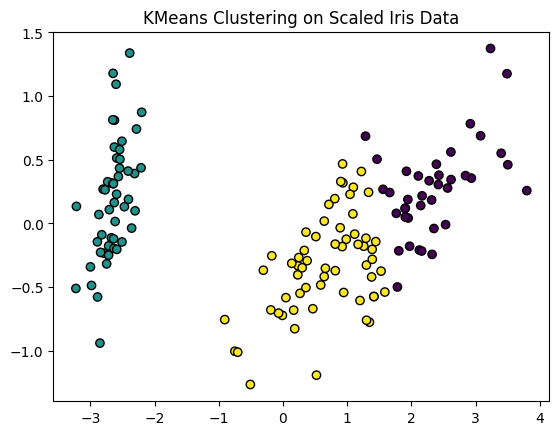

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title("KMeans Clustering on Scaled Iris Data")
plt.show()

## 3.0 Dimensionality reduction

### 3.1 Load data

In [80]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [81]:
X_selected = X[:, :3]

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

### 3.2 Modeling

In [83]:
pca = PCA(n_components=2)

In [84]:
X_pca = pca.fit_transform(X_scaled)

### 3.3 Evaluation

In [85]:
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = y

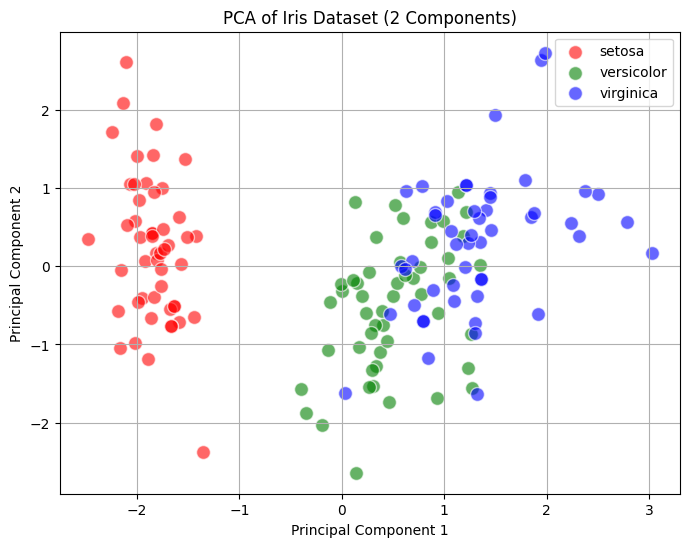

In [86]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, target_name in zip(range(len(target_names)), target_names):
  plt.scatter(pca_df[pca_df['Species'] == i]['Principal Component 1'],
    pca_df[pca_df['Species'] == i]['Principal Component 2'],
    color=colors[i], label=target_name, alpha=0.6, edgecolors='w', s=100)
plt.title('PCA of Iris Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [87]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratios: {explained_variance}')

Explained Variance Ratios: [0.67380995 0.30247819]


### 4.0 Anomaly Detection

### 4.1 Import data

In [89]:
X = iris.data
y = iris.target
target_names = iris.target_names

### 4.2 Modeling

In [90]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)

In [91]:
anomaly_labels = iso_forest.fit_predict(X)

In [92]:
anomaly_labels = np.where(anomaly_labels == -1, 1, 0)

### 4.3 Evaluation

In [93]:
plt.figure(figsize=(10, 8))
colors = ['r' if label == 1 else 'b' for label in anomaly_labels]

<Figure size 1000x800 with 0 Axes>

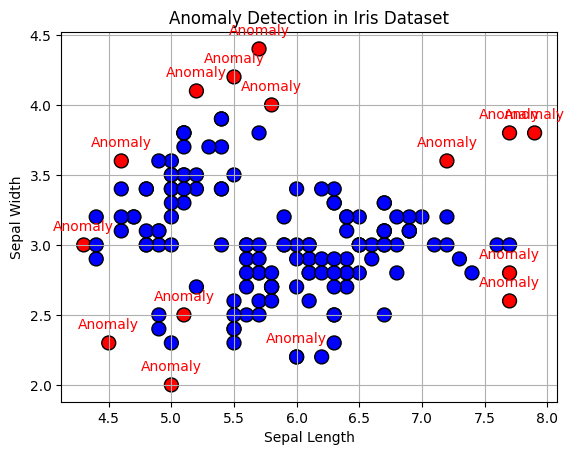

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=100)
plt.title('Anomaly Detection in Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
for i in range(len(anomaly_labels)):
    if anomaly_labels[i] == 1:
      plt.annotate('Anomaly', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.grid()
plt.show()

## 5.0 Autoencoder

### 5.1 Ingest data

In [99]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [100]:
X_train = X_train.reshape((len(X_train), -1)).astype('float32') / 255.0
X_test = X_test.reshape((len(X_test), -1)).astype('float32') / 255.0

### 5.2 Model

In [101]:
input_dim = X_train.shape[1]
encoding_dim = 32

In [102]:
input_layer = Input(shape=(input_dim,))

In [103]:
encoded = Dense(encoding_dim, activation='relu')(input_layer)

In [104]:
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [105]:
autoencoder = Model(input_layer, decoded)

In [106]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [108]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose=0)

In [109]:
encoded_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### 5.3 Evaluation

In [110]:
def plot_mnist_images(original, decoded, n=10):
  plt.figure(figsize=(20, 6))
  for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(original[i].reshape(28, 28), cmap='gray')
    plt.title("Original: {}".format(i))
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
    plt.title("Decoded: {}".format(i))
    plt.axis('off')
  plt.show()

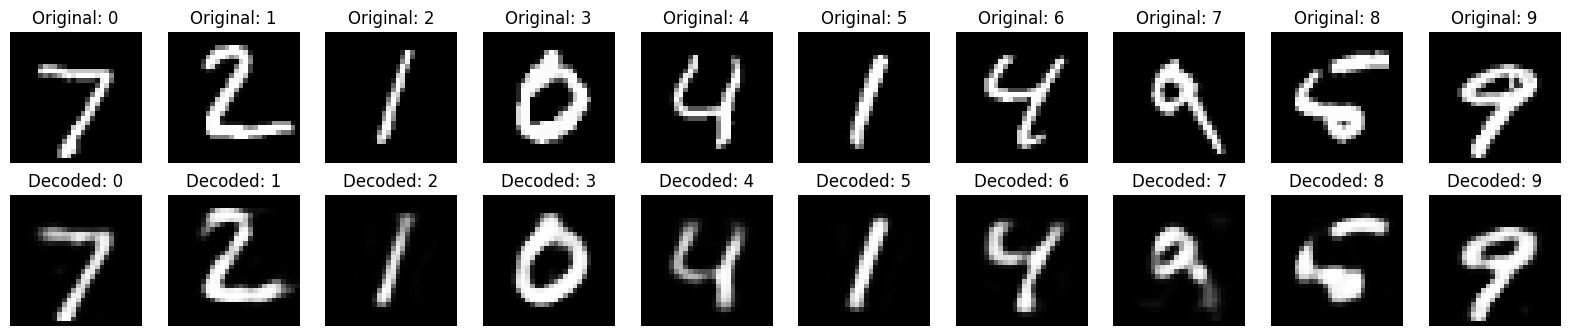

In [111]:
plot_mnist_images(X_test, encoded_images)